In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('datosproyecto1', index_col=0)


In [38]:
data.shape
for i in data["quarter"]:
    if i=="Quarter1":
        data

In [39]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,...,0,59.0,0.940725,1,0,0,0,1,0,0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.90,1170.0,1920,50,...,0,56.0,0.800382,1,0,0,0,1,0,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.90,984.0,6720,38,...,0,56.0,0.800125,1,0,0,0,1,0,0


### Incluir seaborn para Visualización

In [40]:
import seaborn as sns

In [41]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

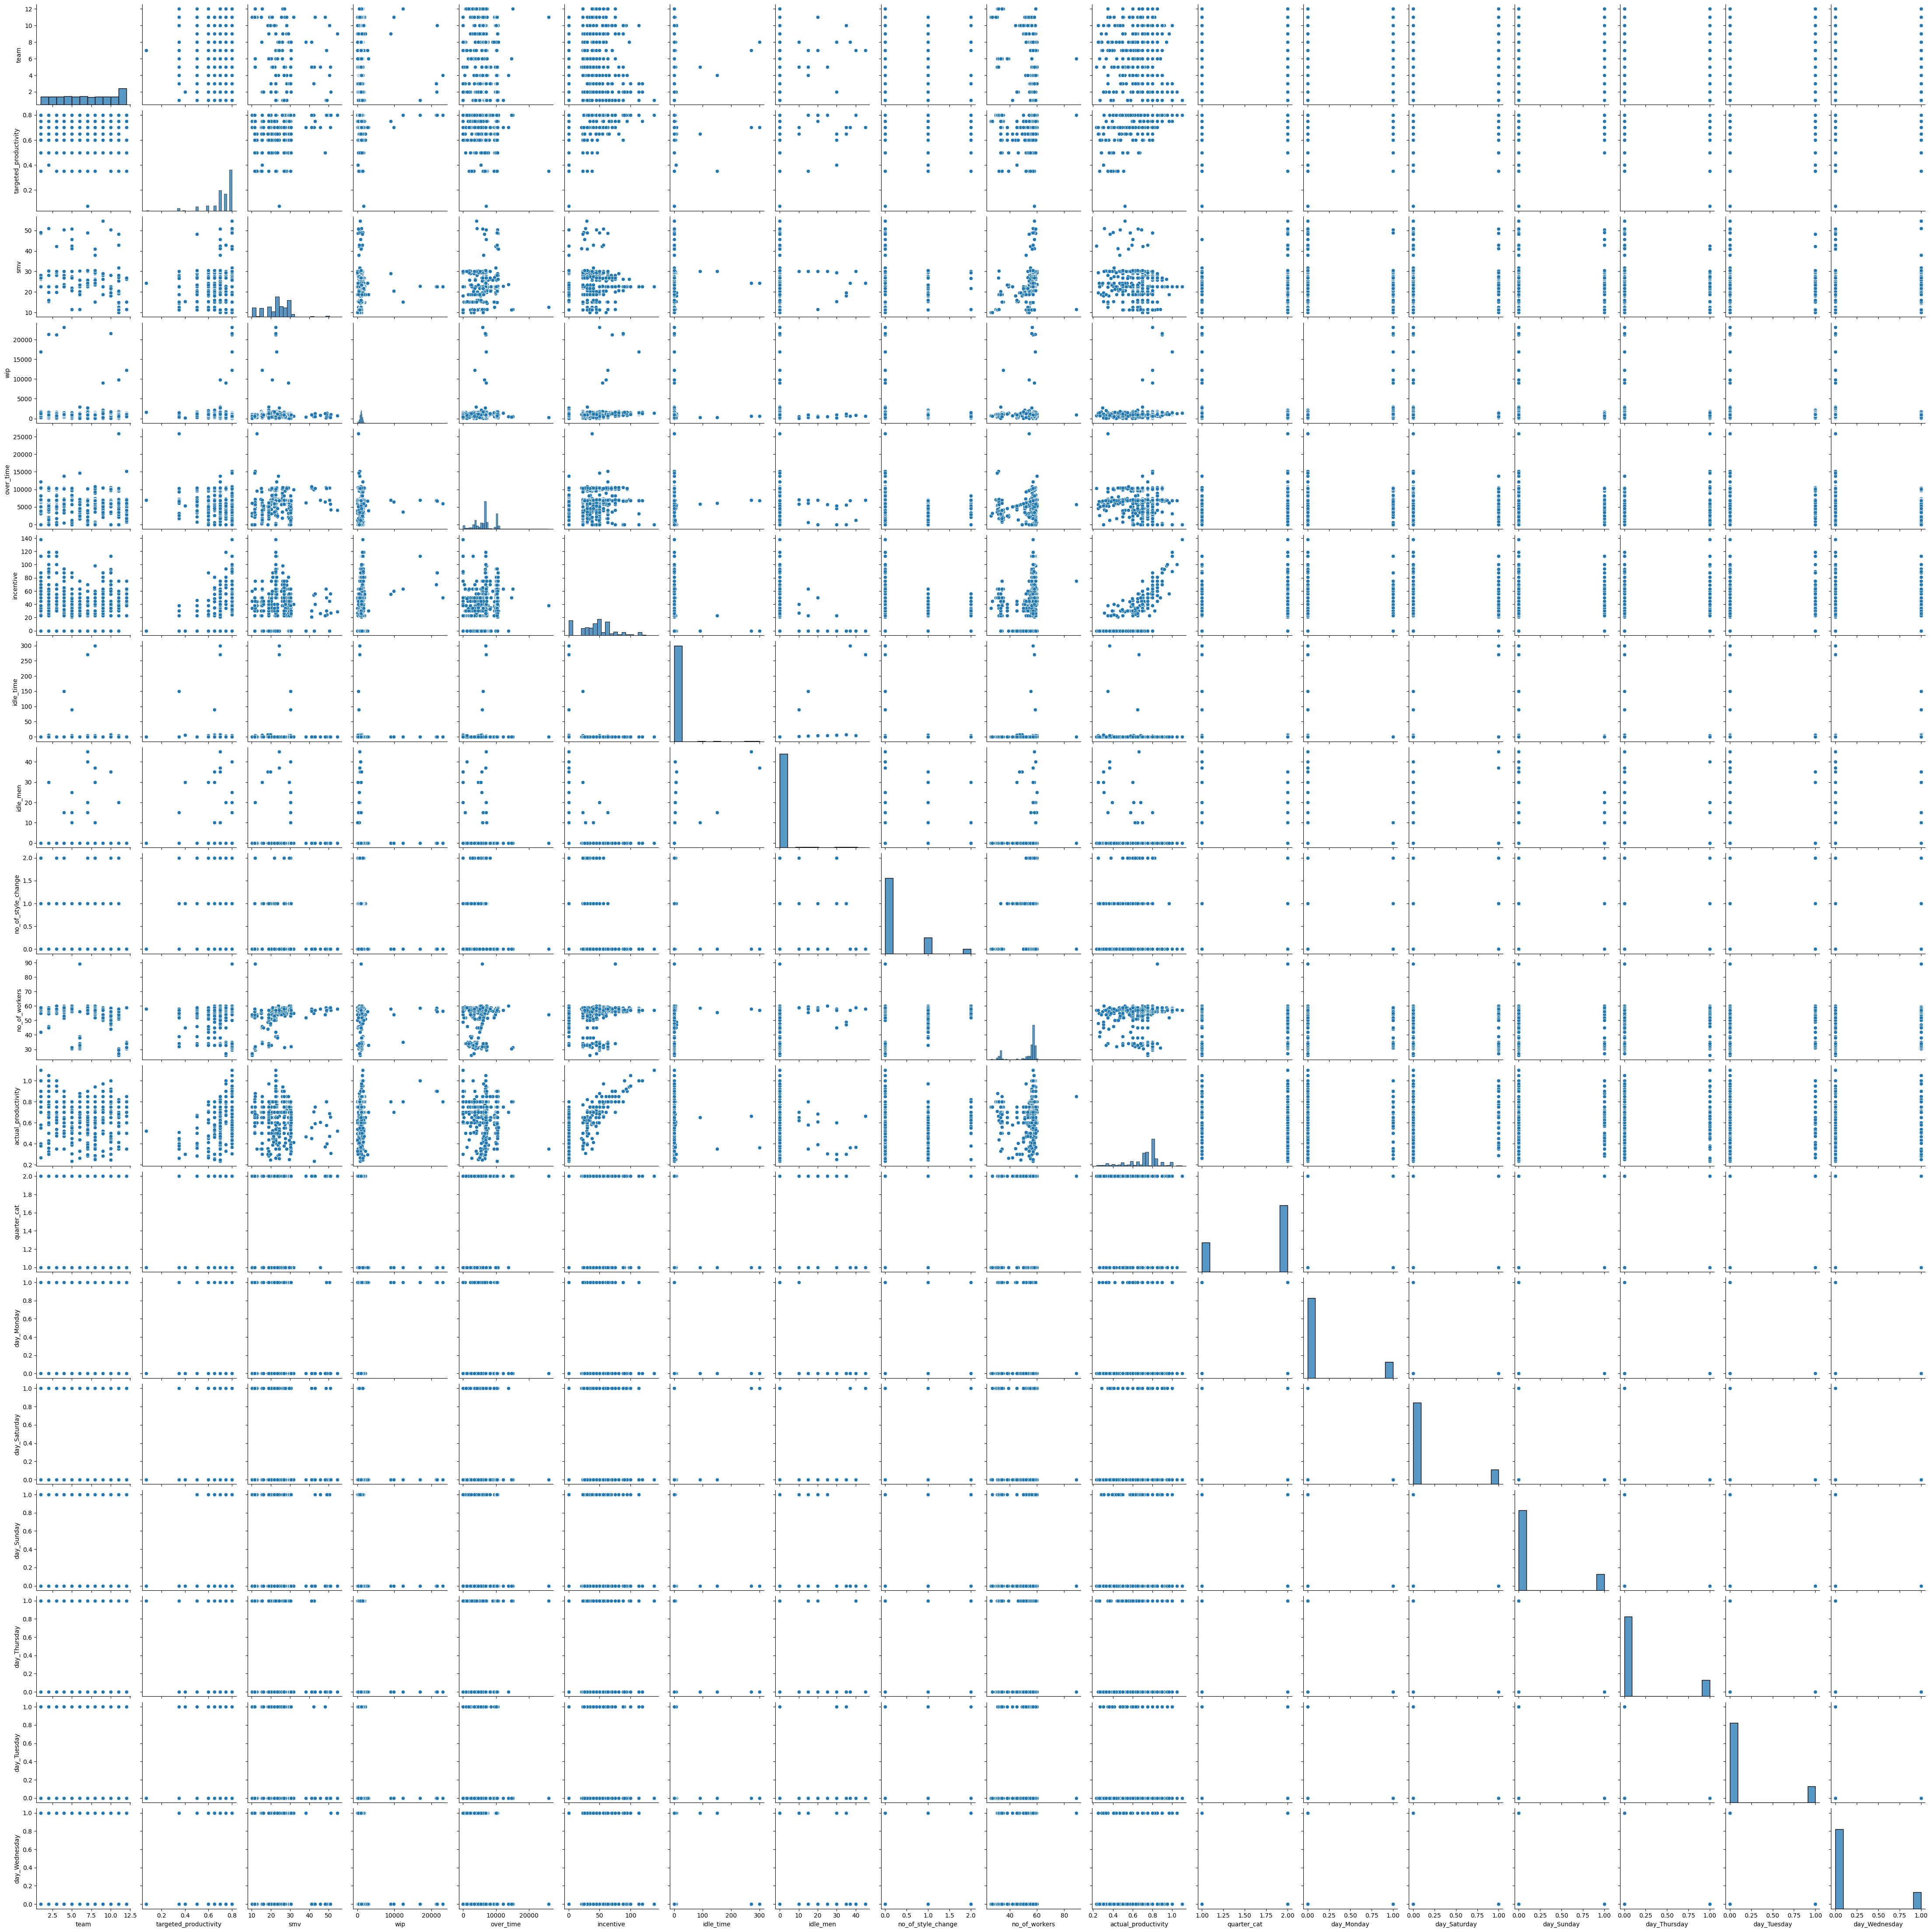

In [42]:
sns.pairplot(data,)

### Matriz de correlación

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

In [43]:

titulos= list(data.columns[:-1])
titulos.remove("date")
titulos.remove("quarter")
titulos.remove("department")
titulos.remove("day")
titulos


['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'quarter_cat',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday']

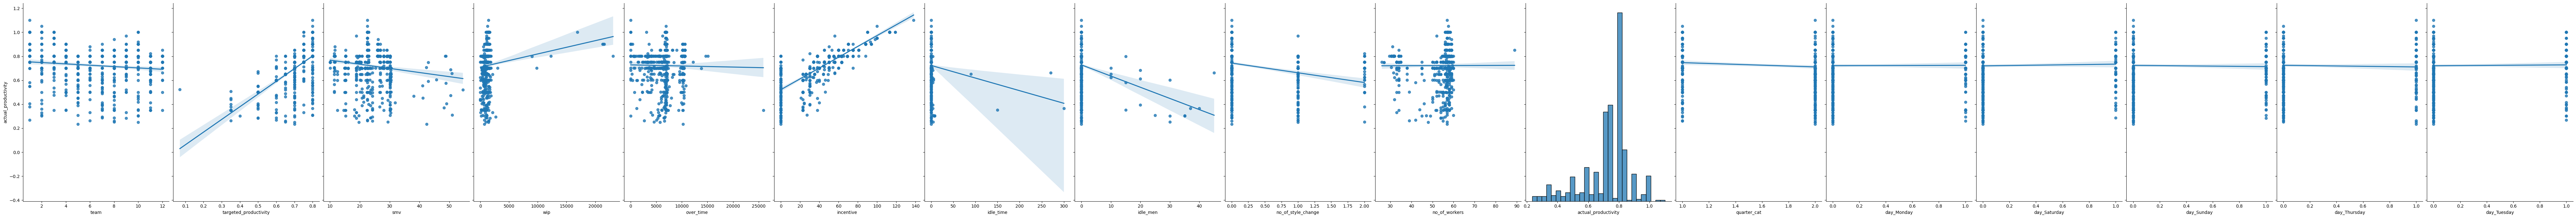

In [44]:

sns.pairplot(data, x_vars=titulos, y_vars='actual_productivity', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 



In [45]:
# nombres de características
features = titulos

# dataframe de características
X = data[features]

X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday
0,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,1,0
2,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
3,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
4,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,1,0
5,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,0,0,0,1,0


In [46]:
X.shape

(691, 17)

In [47]:
# variable de respuesta
y = data['actual_productivity']

y.head()

0    0.940725
2    0.800570
3    0.800570
4    0.800382
5    0.800125
Name: actual_productivity, dtype: float64

In [48]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(518, 17)
(518,)
(173, 17)
(173,)


In [51]:
print(X.head())
print(X_train.head())

   team  targeted_productivity    smv     wip  over_time  incentive  \
0     8                    0.8  26.16  1108.0       7080         98   
2    11                    0.8  11.41   968.0       3660         50   
3    12                    0.8  11.41   968.0       3660         50   
4     6                    0.8  25.90  1170.0       1920         50   
5     7                    0.8  25.90   984.0       6720         38   

   idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.0         0                   0           59.0   
2        0.0         0                   0           30.5   
3        0.0         0                   0           30.5   
4        0.0         0                   0           56.0   
5        0.0         0                   0           56.0   

   actual_productivity  quarter_cat  day_Monday  day_Saturday  day_Sunday  \
0             0.940725            1           0             0           0   
2             0.800570            1           0     

In [52]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [53]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(552, 17)
(552,)
(139, 17)
(139,)


In [54]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [55]:
print(X.head())
print(X_train.head())

   team  targeted_productivity    smv     wip  over_time  incentive  \
0     8                    0.8  26.16  1108.0       7080         98   
2    11                    0.8  11.41   968.0       3660         50   
3    12                    0.8  11.41   968.0       3660         50   
4     6                    0.8  25.90  1170.0       1920         50   
5     7                    0.8  25.90   984.0       6720         38   

   idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.0         0                   0           59.0   
2        0.0         0                   0           30.5   
3        0.0         0                   0           30.5   
4        0.0         0                   0           56.0   
5        0.0         0                   0           56.0   

   actual_productivity  quarter_cat  day_Monday  day_Saturday  day_Sunday  \
0             0.940725            1           0             0           0   
2             0.800570            1           0     

In [56]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(518, 17)
(518,)
(173, 17)
(173,)


In [57]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [58]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [59]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

2.4424906541753444e-15
[-3.29483176e-17  3.69862019e-16 -5.68869332e-17 -1.15945506e-18
  7.89052190e-20  4.88852732e-18 -7.61900837e-18  2.15468731e-18
  1.60921462e-16  3.44002399e-19  1.00000000e+00  1.01553188e-16
  2.31674146e-16  1.85401719e-16 -2.25442470e-16 -1.75335828e-16
  4.20409691e-17]


In [60]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('team', -3.294831755978009e-17),
 ('targeted_productivity', 3.6986201861627377e-16),
 ('smv', -5.688693316637669e-17),
 ('wip', -1.1594550610512494e-18),
 ('over_time', 7.890521897427175e-20),
 ('incentive', 4.888527324329553e-18),
 ('idle_time', -7.619008372272072e-18),
 ('idle_men', 2.154687312165219e-18),
 ('no_of_style_change', 1.6092146154159175e-16),
 ('no_of_workers', 3.4400239878228636e-19),
 ('actual_productivity', 0.999999999999999),
 ('quarter_cat', 1.0155318803217167e-16),
 ('day_Monday', 2.3167414588288067e-16),
 ('day_Saturday', 1.854017187995862e-16),
 ('day_Sunday', -2.254424696387668e-16),
 ('day_Thursday', -1.7533582822009032e-16),
 ('day_Tuesday', 4.204096909762994e-17)]

### Predicciones usando los datos de prueba

In [61]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [62]:
from sklearn import metrics

In [63]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [64]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  4.532745082552348e-16
MSE:  3.776041984776724e-31
RMSE:  6.144950760402173e-16


### Selección de variables - Modelo con otro subconjunto de variables

In [65]:
featuresb = titulos

X = data[featuresb]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  3.343504022137032e-16
MSE:  1.9087412979471555e-31
RMSE:  4.368914393699144e-16


### Validación cruzada

In [66]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[2.19242600e-29 1.41636796e-31 4.75470191e-28 1.11845172e-30
 1.84558796e-30]


In [67]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[4.68233488e-15 3.76346643e-16 2.18052790e-14 1.05756878e-15
 1.35852419e-15]


In [68]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

5.8560106901240036e-15


## Ahora usando statsmodels

In [75]:
import statsmodels.api as sm

features = titulos

X = data[features]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 3.140e+27
Date:                 Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                         20:31:58   Log-Likelihood:                 15695.
No. Observations:                  518   AIC:                        -3.136e+04
Df Residuals:                      503   BIC:                        -3.130e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

### El segundo modelo, sin Newspaper

In [78]:
p_values= model.pvalues
nivel_significancia=0.05
variables_significativas = [X.columns[i] for i in range(len(X.columns)) if p_values[i] < nivel_significancia]


featuresb = variables_significativas

X = data[featuresb]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.628
Model:                             OLS   Adj. R-squared:                  0.627
Method:                  Least Squares   F-statistic:                     434.8
Date:                 Sat, 09 Mar 2024   Prob (F-statistic):          2.53e-111
Time:                         20:34:23   Log-Likelihood:                 480.21
No. Observations:                  518   AIC:                            -954.4
Df Residuals:                      515   BIC:                            -941.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5153      0.008     63.04

C:\Users\luisc\AppData\Local\Temp\ipykernel_28364\2261690612.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variables_significativas = [X.columns[i] for i in range(len(X.columns)) if p_values[i] < nivel_significancia]


### Determinar la influencia de las observaciones

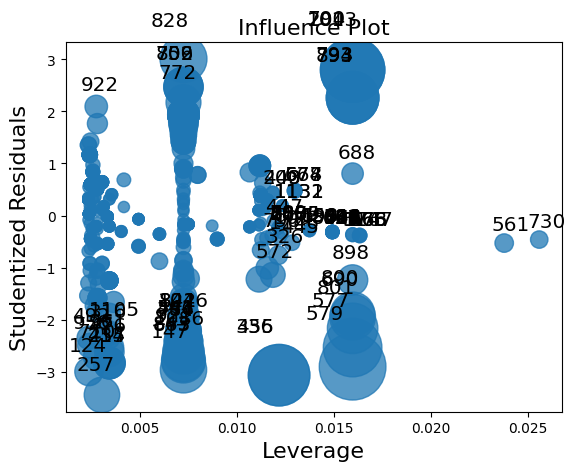

In [79]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [80]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.007722007722007722
Index([ 737,  579,  794,  898,  668,  921,  809,  702,  843,  784,  541, 1067,
        455,  953,  257,  414,  828,  577,  496,  756, 1013,  840,  613,  147,
        793,  822,  237,  251,  204,  893,  476, 1046,  774,  772,  863,  690,
        841,  975,  270,  801,  790,  336,   36, 1086,  255,  800],
      dtype='int64') 
 [0.00792705 0.0449985  0.02743649 0.00827781 0.0091257  0.0162155
 0.01471393 0.01473591 0.01849787 0.01432598 0.01384519 0.00890916
 0.03806369 0.00908965 0.0118293  0.00909033 0.02168461 0.03445803
 0.0140462  0.01468529 0.04163679 0.00930408 0.00907818 0.02106172
 0.02751195 0.01207051 0.00907573 0.0090743  0.04168658 0.02742059
 0.00776439 0.01199667 0.00912713 0.01141524 0.01877687 0.02049962
 0.01190605 0.00908565 0.00907084 0.02524147 0.0419096  0.03802404
 0.00907808 0.01681432 0.00908752 0.01938213]


In [73]:
X_train[out_d]

,const,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday
650,1.0,7,0.70,24.26,6960,0,270.0,45,58.0,0.662270,0,1,0,0,0
139,1.0,6,0.80,11.41,14640,50,0.0,0,30.5,0.800025,0,0,0,1,0
455,1.0,11,0.35,28.08,10260,23,0.0,0,57.0,0.350067,1,0,0,0,0
633,1.0,7,0.07,24.26,6960,0,0.0,0,58.0,0.522845,0,0,0,1,0
191,1.0,4,0.80,50.48,10440,0,0.0,0,58.0,0.473135,0,0,1,0,0
147,1.0,5,0.70,42.41,10260,0,0.0,0,57.0,0.233705,0,0,0,1,0
237,1.0,10,0.35,22.40,10170,23,0.0,0,56.5,0.350206,0,0,0,0,1
204,1.0,3,0.80,19.87,9900,0,0.0,0,55.0,0.800274,1,0,0,0,0
138,1.0,12,0.80,11.61,15120,63,0.0,0,31.5,0.800107,0,0,0,1,0
1046,1.0,2,0.40,15.28,5400,0,6.5,30,45.0,0.302770,0,0,0,0,1


In [74]:
y_train[out_d]

650     0.662270
139     0.800025
455     0.350067
633     0.522845
191     0.473135
147     0.233705
237     0.350206
204     0.800274
138     0.800107
1046    0.302770
841     0.303574
36      0.700134
124     0.412120
316     0.403242
Name: actual_productivity, dtype: float64